In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact_manual, interact
from ipywidgets import Button, HBox, IntText, HTML, VBox
from IPython.display import display, clear_output

In [2]:
%load_ext autoreload
%autoreload 2

# Chargement des données 

On charge les propositions présidentielles.

In [3]:
from funcs import load_data

In [4]:
propositions, candidate_labels = load_data()

# Quizz candidats 

In [5]:
from funcs import GUI

In [6]:
%matplotlib inline

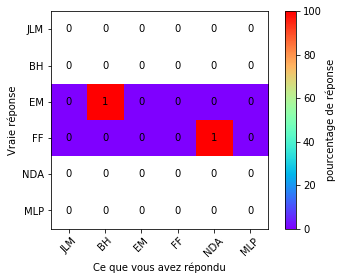

In [7]:
gui = GUI(candidate_labels, propositions)
display(gui.box)

# Recherche plein texte de propositions 

In [ ]:
def make_df(candidate, candidate_label):
    "Returns a dataframe with candidate name."
    ind_s = pd.Series(index=candidate.index, data=[candidate_label], name='candidat')
    return pd.DataFrame(data=[ind_s, candidate]).transpose()

In [ ]:
all_propositions = pd.concat([make_df(c, label) for c, label in zip(candidates, candidate_labels)])

In [ ]:
ind = all_propositions['proposition'].str.lower().str.contains('vert')

In [ ]:
all_propositions[ind]

In [ ]:
mask = all_propositions[ind]

In [ ]:
mask.groupby(by='candidat').sum().iloc[0].values

In [ ]:
from ipywidgets import interact, IntSlider, SelectMultiple

In [ ]:
mask.size

In [ ]:
slider = IntSlider(min=0, max=mask.size - 1)
slider

In [ ]:
selector = SelectMultiple(
        options=mask['proposition'].values.tolist(),
        value=[],
        description='',
        disabled=False,
        )
selector.layout.width='500px'
selector.layout.height = "300px"

In [ ]:
@interact
def search_for_props(search='croissance'):
    ind = all_propositions['proposition'].str.lower().str.contains(search)
    mask = all_propositions[ind]
    selector.options = mask['proposition'].values.tolist()

display(selector)